<a href="https://colab.research.google.com/github/n8mcdunna/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

In [ ]:
!python -m spacy download en_core_web_lg 
# Restart runtime after running this download

In [2]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


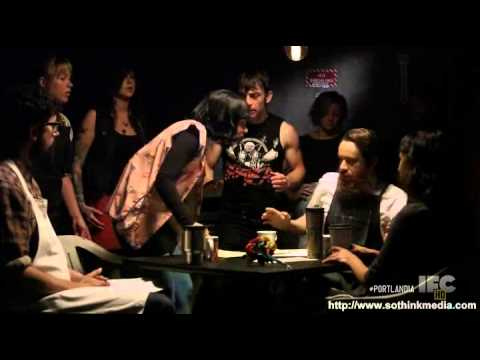

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/content'

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [10]:
shops['star_rating'][0][1]

'5'

In [5]:
# Extracting just the rating from star rating
shops['star_rating'] = shops['star_rating'].apply(lambda x:x[1])

In [6]:
# Remove date from review text
import re
review_text = shops['full_review_text'][4]
shops['full_review_text'] = shops['full_review_text'].apply(lambda text:re.sub('(\d+/\d+/\d+)', '', text))

In [ ]:
shops.head(30)

In [33]:
shops['coffee_shop_name'].nunique()

79

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
# Create "good" or "bad" column based on star rating
shops['Good/Bad'] = shops['star_rating'].replace({
    '1' : 'Bad',
    '2' : 'Bad',
    '3' : 'Bad',
    '4' : 'Good',
    '5' : 'Good'
    })

In [9]:
shops['Good/Bad'].value_counts()

Good    6140
Bad     1476
Name: Good/Bad, dtype: int64

In [19]:
from spacy.tokenizer import Tokenizer

In [37]:
tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(shops['full_review_text']):
  doc_tokens = []
  for token in doc:
    if (token.is_stop == False) & (token.is_punct == False) & (token.is_space == False):
      doc_tokens.append(token.text.lower())
  tokens.append(doc_tokens)
shops.drop(labels=['tokens2'], axis=1,inplace=True)
shops['tokens'] = tokens

In [38]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,Good/Bad,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5,Good,"[1, check-in, love, love, loved, atmosphere!, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4,Good,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4,Good,"[1, check-in, listed, brunch, spots, loved, ec..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2,Bad,"[cool, decor!, good, drinks, nice, seating, ho..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4,Good,"[1, check-in, located, northcross, mall, shopp..."


In [24]:
word_count = count(shops['tokens'])
print(word_count.shape)
word_count.head()

(44520, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
60,the,6520,27779,1.0,0.034660,0.034660,0.856092
29,and,6804,25748,2.0,0.032126,0.066786,0.893382
33,a,6181,22085,3.0,0.027556,0.094342,0.811581
16,I,5469,19780,4.0,0.024680,0.119021,0.718093
12,to,5631,16904,5.0,0.021091,0.140113,0.739364


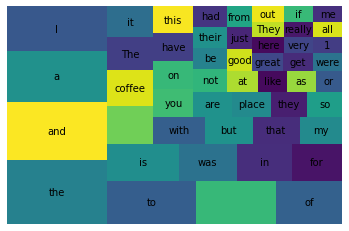

In [28]:
top_50 = word_count.head(50)
squarify.plot(sizes=top_50['pct_total'],label=top_50['word'])
plt.axis('off');

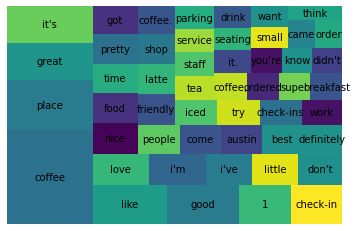

In [42]:
# After using spacy nlp tokenizer and filtering for stop words, punctuation, and whitespaces
word_count = count(shops['tokens'])
filtered_50 = word_count.head(50)
squarify.plot(sizes=filtered_50['pct_total'],label=filtered_50['word'])

plt.axis('off');

In [ ]:
word_count.head(50)

In [117]:
stop_words = nlp.Defaults.stop_words.union(['check', '-', 'in', 'ins'])

In [119]:
'The' in stop_words

False

In [116]:
def get_lemmas(text):
  lemmas = []
  row = nlp(text)

  for token in row:
    if ((token.is_punct == False) and (token.is_space == False) and (token.lower_ not in stop_words) and (token.is_digit == False) and (token.pos_!='-pron-') and (token.pos_!='PRON')):
      lemmas.append(token.lemma_.lower())
  return lemmas

In [120]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [121]:
shops.head(10)

,coffee_shop_name,full_review_text,star_rating,Good/Bad,tokens,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5,Good,"[1, check-in, love, love, loved, atmosphere!, ...","[love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4,Good,"[listed, date, night:, austin,, ambiance, aust...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4,Good,"[1, check-in, listed, brunch, spots, loved, ec...","[list, brunch, spots, love, eclectic, homey, p..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2,Bad,"[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4,Good,"[1, check-in, located, northcross, mall, shopp...","[locate, northcross, mall, shopping, center, f..."
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the ...,4,Good,"[1, check-in, cute, cafe!, think, moment, step...","[cute, cafe, think, moment, step, find, cute, ..."
6,The Factory - Cafe With a Soul,"2 check-ins Listed in ""Nuptial Coffee Bliss!...",4,Good,"[2, check-ins, listed, ""nuptial, coffee, bliss...","[list, nuptial, coffee, bliss, anderson, lane,..."
7,The Factory - Cafe With a Soul,2 check-ins Love this place! 5 stars for cl...,5,Good,"[2, check-ins, love, place!, 5, stars, cleanli...","[love, place, star, cleanliness, star, fun, am..."
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... P...",3,Bad,"[1, check-in, ok,, let's, try, approach..., pr...","[ok, let, try, approach, pro, music, seating, ..."
9,The Factory - Cafe With a Soul,3 check-ins This place has been shown on my ...,5,Good,"[3, check-ins, place, shown, social, media, da...","[place, show, social, medium, day, finally, vi..."


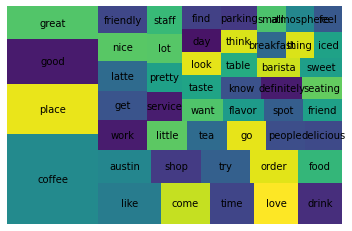

In [122]:
# Plotting after lemmatization and filtering
word_count = count(shops['lemmas'])
filtered_50 = word_count.head(50)
squarify.plot(sizes=filtered_50['pct_total'],label=filtered_50['word'])

plt.axis('off');

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [123]:
# Divide shops dataframe into two dataframes, good and bad
good_shops = shops[shops['Good/Bad'] == 'Good']
bad_shops = shops[shops['Good/Bad'] == 'Bad']

In [ ]:
# coffee, place, and good are the top three words for both good and bad shops

In [138]:
good_shops_words = count(good_shops['lemmas'])
good_shops_words.iloc[3:15]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
71,great,2511,3487,4.0,0.012753,0.077594,0.408958
180,like,1677,2434,5.0,0.008902,0.086496,0.273127
27,love,1610,2132,6.0,0.007797,0.094293,0.262215
48,austin,1586,2043,7.0,0.007472,0.101765,0.258306
376,come,1480,1988,8.0,0.007271,0.109036,0.241042
4,shop,1329,1778,9.0,0.006503,0.115539,0.216450
378,time,1344,1778,10.0,0.006503,0.122042,0.218893
32,drink,1277,1734,11.0,0.006342,0.128383,0.207980
80,try,1332,1712,12.0,0.006261,0.134645,0.216938
33,latte,1037,1555,13.0,0.005687,0.140332,0.168893


In [140]:
bad_shops_words = count(bad_shops['lemmas'])
bad_shops_words.iloc[3:15]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,like,596,945,4.0,0.012309,0.070234,0.403794
104,order,430,759,5.0,0.009886,0.080120,0.291328
68,come,452,650,6.0,0.008467,0.088587,0.306233
214,time,425,617,7.0,0.008037,0.096624,0.287940
32,drink,364,610,8.0,0.007946,0.104569,0.246612
65,food,324,507,9.0,0.006604,0.111173,0.219512
58,great,348,472,10.0,0.006148,0.117321,0.235772
27,service,347,450,11.0,0.005862,0.123183,0.235095
103,go,338,450,12.0,0.005862,0.129044,0.228997
9,get,332,445,13.0,0.005796,0.134841,0.224932


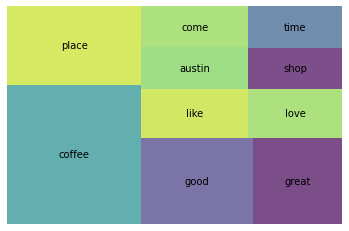

In [129]:
good_shops_words = count(good_shops['lemmas'])
top_10_good = good_shops_words.iloc[1:10]
squarify.plot(sizes=top_10_good['pct_total'],label=top_10_good['word'], alpha= 0.7)
plt.axis('off')
plt.show();

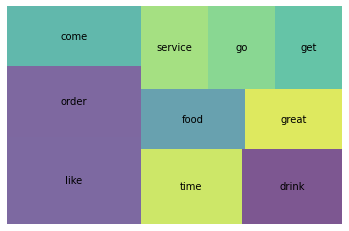

In [133]:
# Plotting top 10 most used words in reviews for bad shops
bad_shops_words = count(bad_shops['lemmas'])
top_10_bad = bad_shops_words.iloc[0:10]
squarify.plot(sizes=top_10_bad['pct_total'],label=top_10_bad['word'], alpha= 0.7)
plt.axis('off')
plt.show();

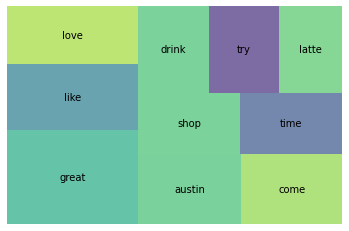

In [135]:
good_shops_words = count(good_shops['lemmas'])
top_10_good = good_shops_words.iloc[3:13]
squarify.plot(sizes=top_10_good['pct_total'],label=top_10_good['word'], alpha= 0.7)
plt.axis('off')
plt.show();

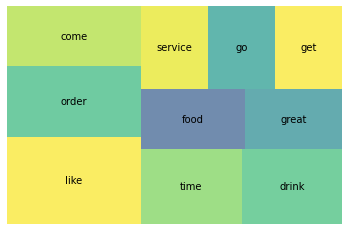

In [132]:
bad_shops_words = count(bad_shops['lemmas'])
top_10_bad = bad_shops_words.iloc[3:13]
squarify.plot(sizes=top_10_bad['pct_total'],label=top_10_bad['word'], alpha= 0.7)
plt.axis('off')
plt.show();

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 



In [22]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')